In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [142]:
employee = pd.read_csv("C:/Users/mncedisi.mncwabe/Documents/Practices/Employee_Turnover.csv")

In [143]:
employee.head()

,role,perf,area,sex,id,age,salary,vol_leave
0,CEO,3,Sales,Male,1,62.000000,1000000.000000,0
1,Director,3,Marketing,Male,32,53.358969,258934.658863,0
2,Director,1,Finance,Male,76,53.486362,189828.441976,1
3,Director,2,Sales,Male,69,49.165713,207492.347565,0
4,Director,3,Marketing,Male,28,49.779683,188204.745541,0


In [5]:
employee.shape

(11111, 8)

In [6]:
# no missing values

employee.isnull().sum()

role         0
perf         0
area         0
sex          0
id           0
age          0
salary       0
vol_leave    0
dtype: int64

In [7]:
employee.describe()

,perf,id,age,salary,vol_leave
count,11111.000000,11111.000000,11111.000000,11111.000000,11111.000000
mean,2.198182,5556.000000,27.793110,65357.924710,0.381244
std,0.600000,3207.613755,6.261903,24638.643069,0.485714
min,1.000000,1.000000,22.022891,42168.221580,0.000000
25%,2.000000,2778.500000,24.071550,57081.348462,0.000000
50%,2.000000,5556.000000,25.698938,60798.377589,0.000000
75%,3.000000,8333.500000,28.487338,64945.326302,1.000000
max,3.000000,11111.000000,62.000000,1000000.000000,1.000000


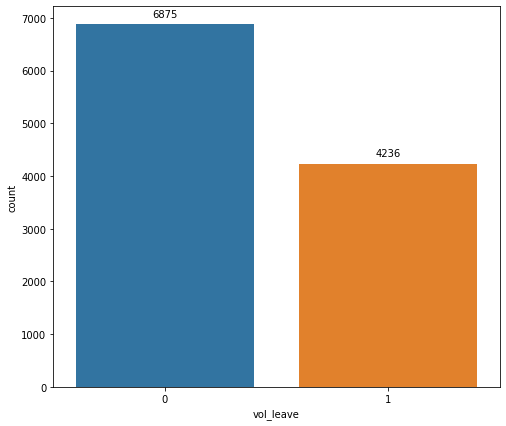

In [12]:
# check how many employees left and how many didn't

plt.figure(figsize=(8,7))
plot = sns.countplot(x = 'vol_leave',data = employee)
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [13]:
# 4236 (38%) employees left the company

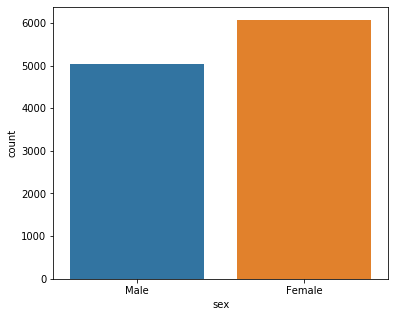

In [17]:
# check how many Males and Fenales are there

plt.figure(figsize=(6,5))
sns.countplot(x='sex',data=employee)

In [18]:
# most employees are females

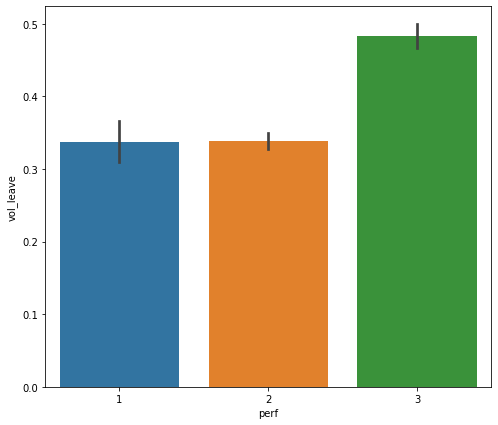

In [20]:
# check how many employees left by perfomance

plt.figure(figsize=(8,7))
sns.barplot(x = 'perf',y = 'vol_leave',data = employee)


In [15]:
# we can see that the turnover is much higher for the high performance group
# this is a problem and needs to be looked at

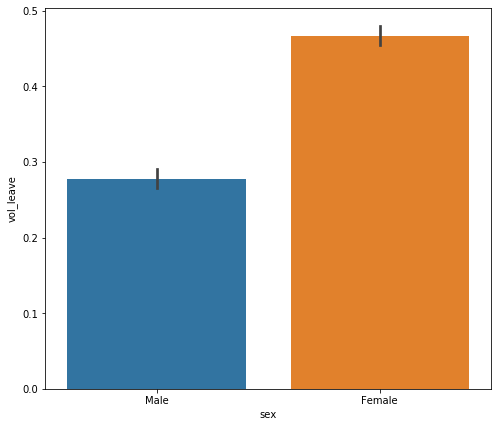

In [22]:
# Now let's check Turnover rate by gender

plt.figure(figsize=(8,7))
sns.barplot(x='sex',y='vol_leave',data=employee)



In [23]:
# High turnover rate for Female employees

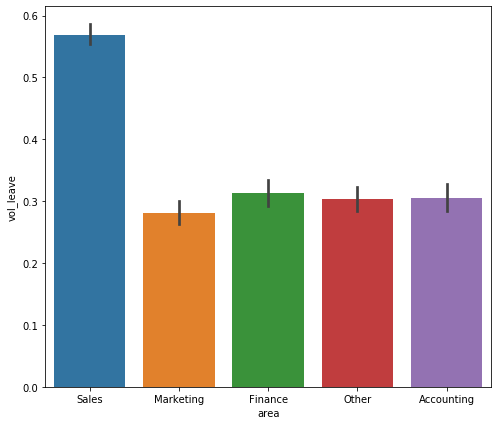

In [24]:
# Let's now check what's happening in each department

plt.figure(figsize=(8,7))
sns.barplot(x='area',y='vol_leave',data=employee)

In [25]:
# There's a big problem in the Sales department with above 55% turnover rate
# Those in Sales are much more likely to leave

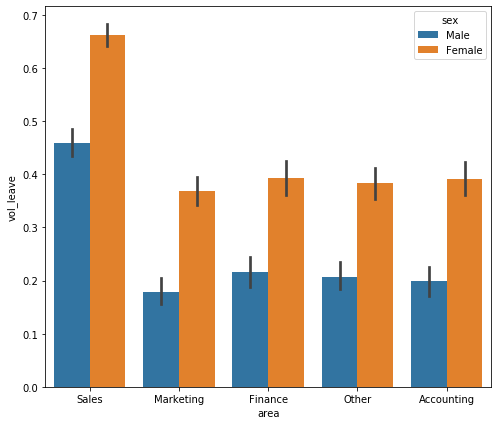

In [29]:
# Let's now check Gendr turnover rate in each Department

plt.figure(figsize=(8,7))
sns.barplot(x="area",y="vol_leave",hue="sex",data=employee)

In [30]:
# As we observed in previous above plots that there's high turnover rate for females and employees in Sales department
# The above plot shows that the Females in Sales department are going to leave as they have highest turnover rate

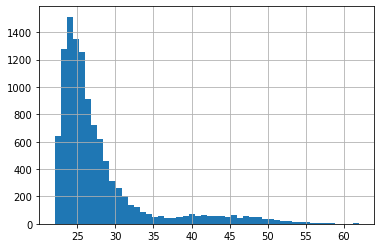

In [49]:
# let's look at the distribution of age

employee['age'].hist(bins=50)

In [32]:
# There is a strong skew, with 50% of the employees between 22 and 26 years of age. 

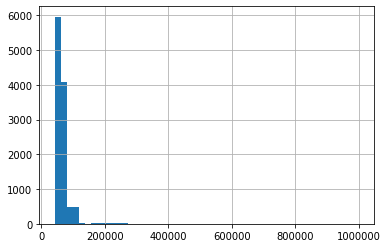

In [70]:
# let's look at the distribution of salary

employee['salary'].hist(bins=50)

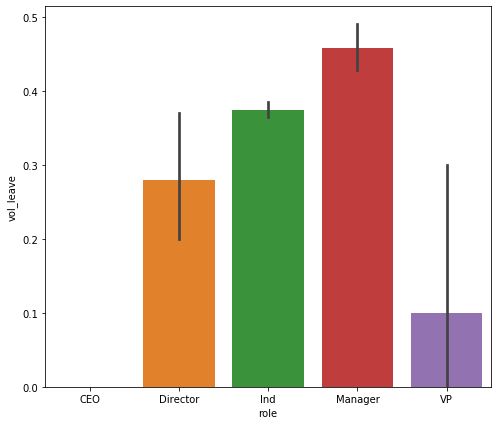

In [56]:
# check turnover rate by role
plt.figure(figsize=(8,7))
sns.barplot(x='role',y='vol_leave',data=employee)

In [36]:
# Managers and Individuals are mist likely to leave

In [144]:
# make categories/groups for salary

salary = employee['salary'].values
category = []
for num in salary:
    if num > 42000 and num <= 58000:
        category.append("Low")
    elif num > 58000 and num <= 75000 :
        category.append("Medium")
    else:
        category.append("High")

In [145]:
# check how many employees are earning low, medium and high salaries
[(i, category.count(i)) for i in set(category)]

[('Medium', 6579), ('Low', 3407), ('High', 1125)]

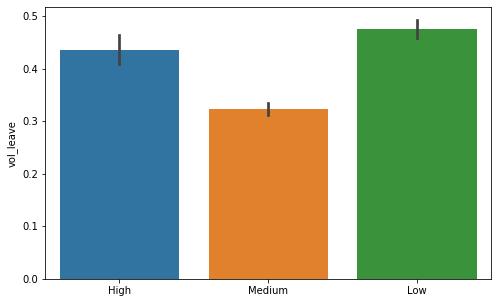

In [41]:
# now let's check which salary groups are more likely to leave

plt.figure(figsize = (8,5))
sns.barplot(category,y='vol_leave',data=employee)

In [43]:
# Employees earning low salaries are more likely to leave
# followed by employees earning high salaries (this is a problem)

In [146]:
# make categories/groups age by creating variable age range

bins = [22, 30, 40, 50, 60,70]
labels = ['22-29', '30-39', '40-49','50-59', '60-69']
employee['agerange'] = pd.cut(employee['age'], bins, labels = labels,include_lowest = True)

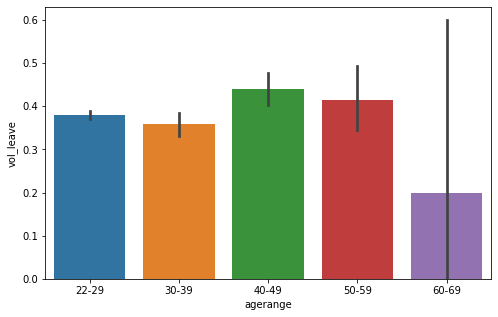

In [52]:
plt.figure(figsize = (8,5))
sns.barplot(x='agerange',y='vol_leave',data=employee)

In [54]:
# Employees at the age between 40-49 and 50-59 are more likely to leave

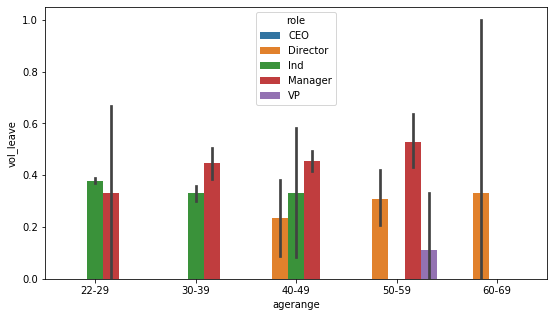

In [59]:
# On the previuos plot we observed that in terms of roles, the employees that are more likely to leave are managers
# let's now check if age is the factor leading to this

plt.figure(figsize=(9,5))
sns.barplot(x='agerange',y='vol_leave',hue='role',data=employee)

In [60]:
# There we go, it turns out most of those managers that are more likely to leave are those between 50-59 years of age.
# Age is the cause of this

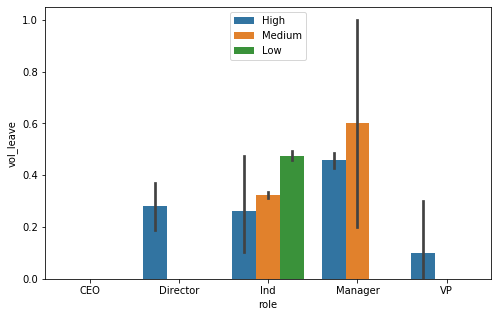

In [64]:
# salary by role - let's also check if salary might be the cause for those managers likely to leave

plt.figure(figsize = (8,5))
sns.barplot(x='role',y='vol_leave',hue=category,data=employee)

In [65]:
# the managers that are likely to leave are earning medium salary
# also the individuals the are likely to leave are those earning low salaries

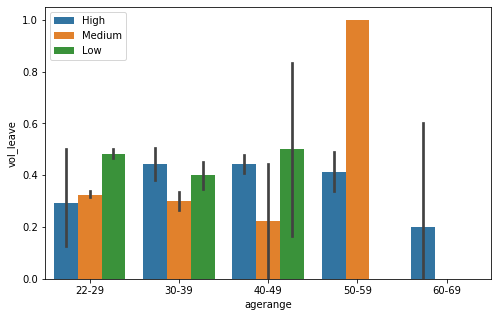

In [61]:
# We've also seen that employees earning hih and low salaries are more likely to leave
# let's check if age might be the reason for this or not

plt.figure(figsize = (8,5))
sns.barplot(x='agerange',y='vol_leave',hue=category,data=employee)

In [63]:
# It turns out those employees earning high salaries with a high turnover rate are those between 30-39 and 40-49
# also we can see a spike in turnover rate on those employees earning medium salaries at the age 50-59

In [147]:
# let's drop id column and the variable we creted 'age range' we wn't need them in the model
employee = employee.drop('id',axis=1)
employee = employee.drop('agerange',axis=1)

In [148]:
employee.head()

,role,perf,area,sex,age,salary,vol_leave
0,CEO,3,Sales,Male,62.000000,1000000.000000,0
1,Director,3,Marketing,Male,53.358969,258934.658863,0
2,Director,1,Finance,Male,53.486362,189828.441976,1
3,Director,2,Sales,Male,49.165713,207492.347565,0
4,Director,3,Marketing,Male,49.779683,188204.745541,0


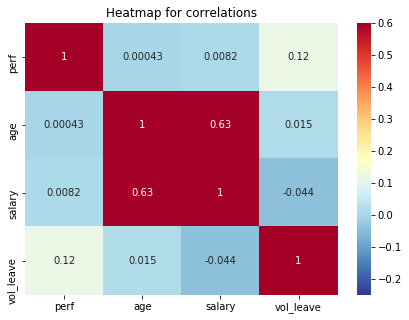

In [72]:
# let's check correlation of predictor variables with vol_leave
plt.figure(figsize=(7,5))
sns.heatmap(employee.corr(),cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Heatmap for correlations');

In [73]:
# Perfomarmance have slighly significant relationship with employee leaving or not
# Also age and salary have moderate correlation/relatioship with each other
# Even though the correlation between salary and employee leaving or not is small,
# the negative sign tells us that as salary increases the chances of an enployee leaving becomes small
# Age and employee leaving or not have positive correlation, this tells us that as age increases the chances of 
# an employee leaving increases, as the employee gets older he's more likely to leave the company

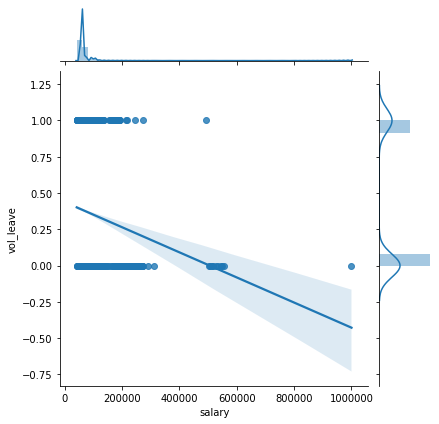

In [74]:
# let's confirm what we observed on the correlation heatmap
sns.jointplot("salary", "vol_leave", data=employee, kind="reg")

In [75]:
# Indeed as the salary increases, chances of an employee leaving the company becomes very small

In [149]:
# Transform/ normalize the skewed variables , age and salary

from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
pt.fit(employee[['age']])
employee['log_age'] = pt.transform(employee[['age']])

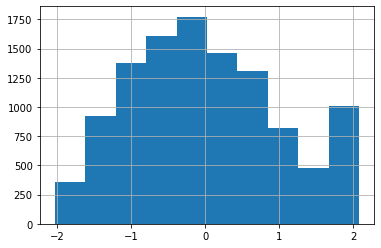

In [150]:
employee['log_age'].hist()

In [91]:
# check skewness of age and salary before and after transformation
employee['age'].skew()

2.2794255218771484

In [92]:
employee['log_age'].skew()

0.2889638580576735

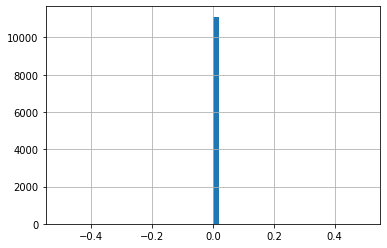

In [100]:
employee['log_salary'].hist(bins=50)

In [106]:
# ---------------------Data Preprocessing------------------

#-------------------First Import Machine Learning Algorithms-------------

#Classification Algorithms 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix,
from sklearn.metrics import mean_squared_error 
from sklearn import preprocessing

In [151]:
employee.head()

,role,perf,area,sex,age,salary,vol_leave,log_age
0,CEO,3,Sales,Male,62.000000,1000000.000000,0,2.077853
1,Director,3,Marketing,Male,53.358969,258934.658863,0,2.027131
2,Director,1,Finance,Male,53.486362,189828.441976,1,2.028208
3,Director,2,Sales,Male,49.165713,207492.347565,0,1.982893
4,Director,3,Marketing,Male,49.779683,188204.745541,0,1.990602


In [152]:
employee= pd.concat([employee,pd.get_dummies(employee['sex'], prefix = 'sex')], axis=1)
employee= pd.concat([employee,pd.get_dummies(employee['area'], prefix = 'area')], axis=1)
employee= pd.concat([employee,pd.get_dummies(employee['role'], prefix = 'role')], axis=1)
employee= pd.concat([employee,pd.get_dummies(employee['perf'], prefix = 'perf')], axis=1)

In [108]:
# Encode Categorical variables

le = LabelEncoder()
employee['role'] = le.fit_transform(employee['role'])
employee['area'] = le.fit_transform(employee['area'])
employee['sex'] = le.fit_transform(employee['sex'])

In [157]:
employee.head()

,salary,vol_leave,log_age,sex_Female,sex_Male,area_Accounting,area_Finance,area_Marketing,area_Other,area_Sales,role_CEO,role_Director,role_Ind,role_Manager,role_VP,perf_1,perf_2,perf_3
0,1000000.000000,0,2.077853,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1
1,258934.658863,0,2.027131,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
2,189828.441976,1,2.028208,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0
3,207492.347565,0,1.982893,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0
4,188204.745541,0,1.990602,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1


In [154]:
employee = employee.drop('area',axis=1)
employee = employee.drop('perf',axis=1)
employee = employee.drop('sex',axis=1)
employee = employee.drop('role',axis=1)

In [156]:
employee = employee.drop('age',axis=1)

In [158]:
X = employee.drop('vol_leave',axis=1)
y = employee['vol_leave']

In [191]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [192]:
# Logistic Regression

lm = LogisticRegression()
lm.fit(X_train,y_train)
lm.score(X_test,y_test)*100

62.0875824835033

In [193]:
# Random Forest

rf = RandomForestClassifier()
rf.fit(X_train,y_train)
print("accuracy:",rf.score(X_test,y_test)*100)

accuracy: 64.30713857228554


In [194]:
# Gradient Boosting model

gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
print("accuracy:",gb.score(X_test,y_test)*100)

accuracy: 67.12657468506299


In [195]:
# Decision Tree

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
print("accuracy:",dt.score(X_test,y_test)*100)

accuracy: 59.98800239952009


In [197]:
# CV Gradient Boosting

rf_cv = cross_val_score(gb, X_train, y_train, cv = 5)
rf_cv.mean()*100

69.07517007083874

In [126]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [127]:
import xgboost 
from xgboost import XGBClassifier

In [198]:
# XG Boost 

xgb = XGBClassifier()
xgb.fit(X_train,y_train)
xgb.score(X_test,y_test)*100

65.29694061187763

In [199]:
# SVC

svc = SVC()
svc.fit(X_train,y_train)
svc.score(X_test,y_test)*100

62.0875824835033

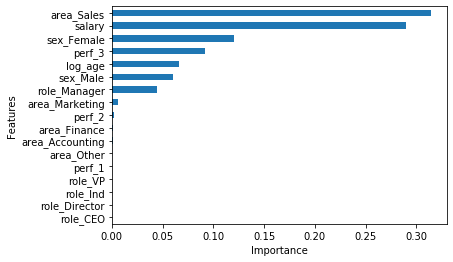

In [203]:

feat_importances = pd.Series(gb.feature_importances_, index=X_train.columns)
feat_importances.nsmallest(20).plot(kind='barh')
importances = gb.feature_importances_
indices = np.argsort(importances)


plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

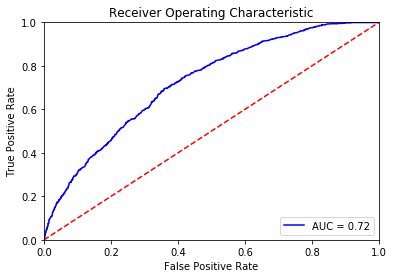

In [201]:
probs = gb.predict_proba(X_test)  #for gradient boosting
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()